<a href="https://colab.research.google.com/github/Burakozturk0/tpxle-doc/blob/main/COPD_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#run

In [935]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [936]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report, accuracy_score
#from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
#from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [937]:
#from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [938]:
scaler = StandardScaler()
rfc = RandomForestClassifier(n_estimators=1000,max_depth = 2,random_state=42,)
svc = SVC(kernel = 'linear')

In [939]:
data  = pd.read_csv('dataset.csv')

In [940]:
data.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [941]:
data.columns

Index(['Unnamed: 0', 'ID', 'AGE', 'PackHistory', 'COPDSEVERITY', 'MWT1',
       'MWT2', 'MWT1Best', 'FEV1', 'FEV1PRED', 'FVC', 'FVCPRED', 'CAT', 'HAD',
       'SGRQ', 'AGEquartiles', 'copd', 'gender', 'smoking', 'Diabetes',
       'muscular', 'hypertension', 'AtrialFib', 'IHD'],
      dtype='object')

In [942]:
print(data['copd'].value_counts())
print(data['COPDSEVERITY'].value_counts())

2    43
3    27
1    23
4     8
Name: copd, dtype: int64
MODERATE       43
SEVERE         27
MILD           23
VERY SEVERE     8
Name: COPDSEVERITY, dtype: int64


In [943]:
data.isnull().sum()

Unnamed: 0      0
ID              0
AGE             0
PackHistory     0
COPDSEVERITY    0
MWT1            2
MWT2            1
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

Dropping the unwanted columns to make the results more accurate

In [944]:
columns = ['Unnamed: 0', 'ID','COPDSEVERITY','MWT1','MWT2']
data.drop(columns=columns, axis=1,inplace=True)

#EDA

2 boyutlu 1900 boyutunda

In [945]:
print(f'Shape     :{data.shape}\n'
      f'Size      :{data.size}\n'
      f'Dimension :{data.ndim}\n' )


Shape     :(101, 19)
Size      :1919
Dimension :2



In [946]:
data.shape

(101, 19)

In [947]:
data.head()

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


In [948]:
data.isnull().sum()

AGE             0
PackHistory     0
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [949]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           101 non-null    int64  
 1   PackHistory   101 non-null    float64
 2   MWT1Best      100 non-null    float64
 3   FEV1          101 non-null    float64
 4   FEV1PRED      101 non-null    float64
 5   FVC           101 non-null    float64
 6   FVCPRED       101 non-null    int64  
 7   CAT           101 non-null    int64  
 8   HAD           101 non-null    float64
 9   SGRQ          101 non-null    float64
 10  AGEquartiles  101 non-null    int64  
 11  copd          101 non-null    int64  
 12  gender        101 non-null    int64  
 13  smoking       101 non-null    int64  
 14  Diabetes      101 non-null    int64  
 15  muscular      101 non-null    int64  
 16  hypertension  101 non-null    int64  
 17  AtrialFib     101 non-null    int64  
 18  IHD           101 non-null    

duplike = kopya ya da aynı olan veriler . Aynı olan satırlar varsa

In [950]:
data.duplicated().sum()

0

ANALİZ . TANIMLAMA
OUTLİER TESPİTİ MİN-MEAN YA DA MAX-75% ARASINDA ÇOK BÜYÜK FARK VARSA BU OTULİER DEĞERİDİR DİYEBİLİRİZ

In [951]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,101.0,70.099010,7.898740,44.00,65.00,71.00,75.00,88.00
PackHistory,101.0,39.698020,24.558713,1.00,20.00,36.00,54.00,109.00
MWT1Best,100.0,399.110000,106.550116,120.00,303.75,420.00,465.25,699.00
FEV1,101.0,1.603762,0.672763,0.45,1.10,1.60,1.96,3.18
FEV1PRED,101.0,58.531485,22.294821,3.29,42.00,60.00,75.00,102.00
FVC,101.0,2.954950,0.976283,1.14,2.27,2.77,3.63,5.37
FVCPRED,101.0,86.435644,21.740016,27.00,71.00,84.00,103.00,132.00
CAT,101.0,19.336634,18.674730,3.00,12.00,18.00,24.00,188.00
HAD,101.0,11.180198,8.588807,0.00,6.00,10.00,15.00,56.20
SGRQ,101.0,40.185842,18.239268,2.00,28.41,38.21,55.23,77.44


kaç tane eşsiz değer var

In [952]:
data.nunique()

AGE             33
PackHistory     48
MWT1Best        71
FEV1            85
FEV1PRED        51
FVC             80
FVCPRED         57
CAT             30
HAD             28
SGRQ            89
AGEquartiles     4
copd             4
gender           2
smoking          2
Diabetes         2
muscular         2
hypertension     2
AtrialFib        2
IHD              2
dtype: int64

KATEGORİK OLANLAR 10 DAN AZ OLANLAR
NUMERİK KISIMLAR 10 DAN FAZLA OLANLAR

In [953]:
#cat_cols=['AGE','PackHistory','MWT1Best','FEV1','FEV1PRED','FVC','FVCPRED','CAT','HAD','SGRQ']
#num_cols=['AGEquartiles','copd','gender','smoking','Diabetes','muscular','hypertension','AtrialFib','IHD']

#VISUALIZATION

Exploratory Data Anaylsis

<Axes: >

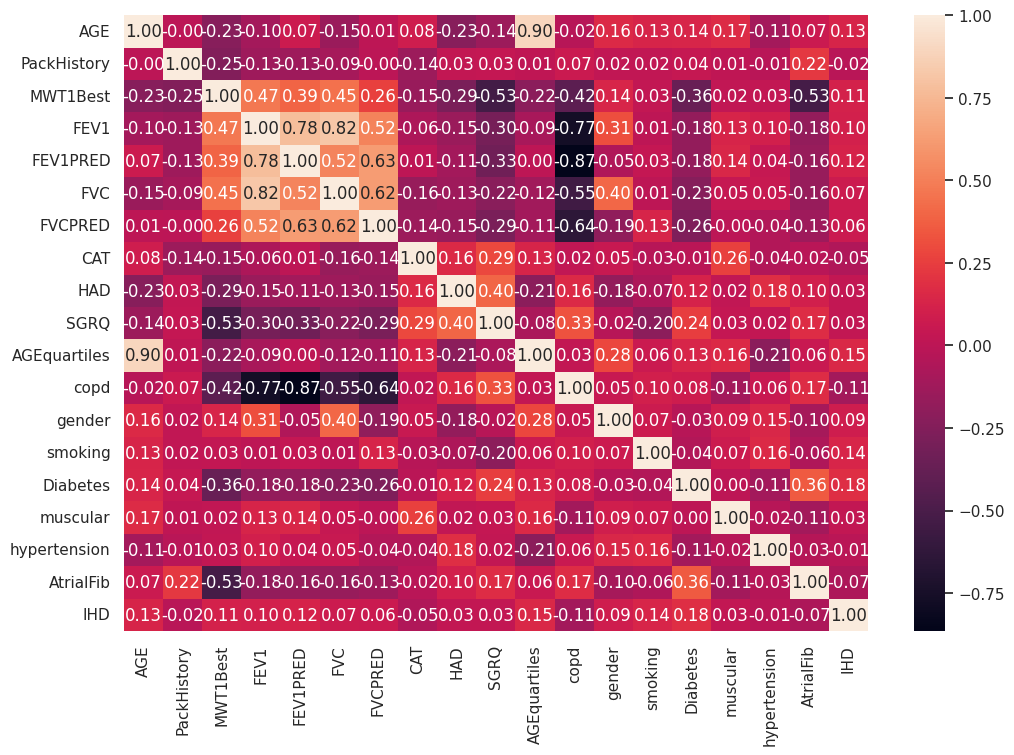

In [954]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,cmap='rocket',fmt='.2f')

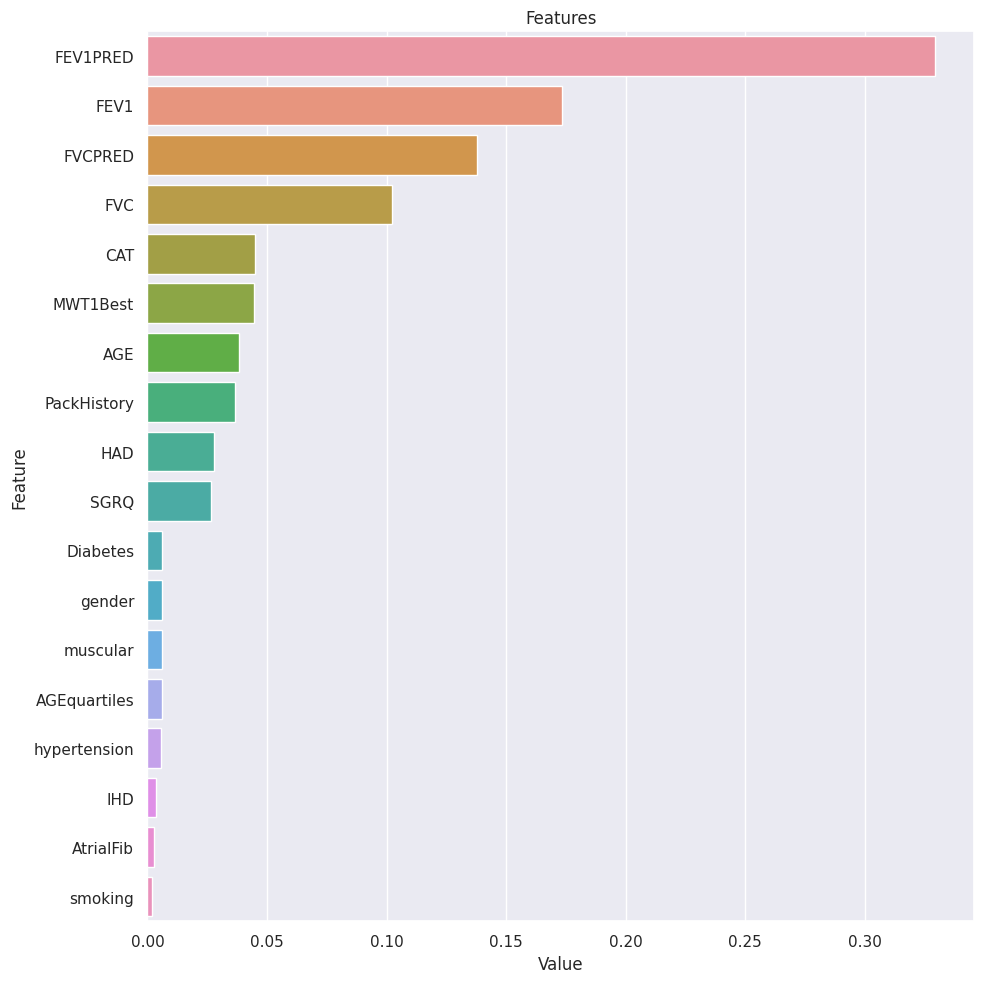

In [955]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_,
                                'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

# Veriyi hazırla
# Burada X ve y'yi nasıl tanımladığınıza bağlı olarak uygun bir şekilde hazırlamalısınız.
# Örneğin, X_train, y_train gibi eğitim verilerini kullanabilirsiniz.

# RandomForestClassifier modeli oluştur
rfc = RandomForestClassifier(n_estimators=1000, max_depth=2, random_state=42)

# Modeli eğit
rfc.fit(X_train, y_train)

# plot_importance fonksiyonunu kullanarak özellik önem sıralaması çiz
plot_importance(rfc, X_train)

COPD - Severity levels
(VERY SEVERE - 4
SEVERE      - 3
MODERATE    - 2
MILD        - 1)

In [956]:
data['copd'].value_counts()

2    43
3    27
1    23
4     8
Name: copd, dtype: int64

In [957]:
df = data.groupby([pd.cut(data['AGE'], bins=3),'copd']).size().unstack().reset_index().rename(columns={'index': 'AGE'})

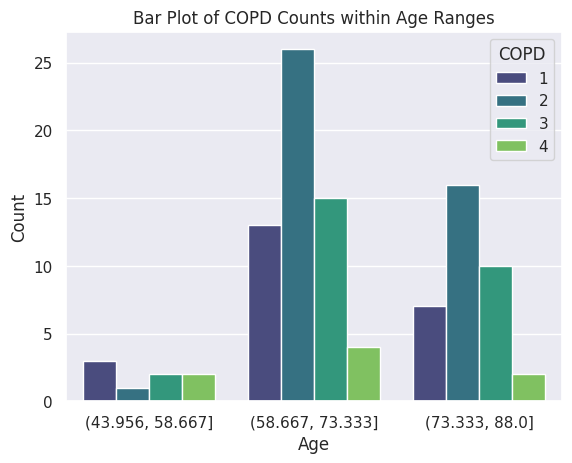

In [958]:
df_melted = pd.melt(df, id_vars=['AGE'], var_name='COPD', value_name='Count')
sns.barplot(x='AGE', y='Count', hue='COPD', data=df_melted, palette='viridis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Plot of COPD Counts within Age Ranges')
plt.legend(title='COPD')
plt.show()

In [959]:
data['gender'].value_counts().max()

65

cinsiyetlere göre hastalık dereceleri ve oranları

<Axes: xlabel='gender', ylabel='Count'>

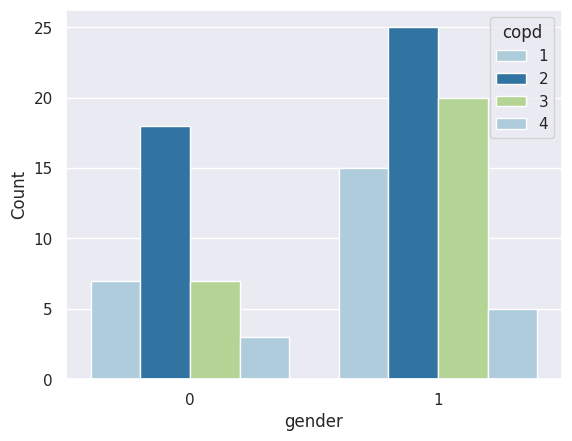

In [960]:
res = females_COPD.melt(id_vars='gender',var_name='copd',value_name='Count')
custom_palette = sns.color_palette("Paired", 3)
sns.barplot(data=res,x='gender',y='Count',hue='copd',palette=custom_palette)

In [961]:
print(females_COPD.columns)


Index(['gender', 1, 2, 3, 4], dtype='object', name='copd')


Finding the null and duplicated values

In [962]:
data.isna().sum()

AGE             0
PackHistory     0
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [963]:
data.fillna(data.mean(),inplace=True)

In [964]:
data.isna().sum()

AGE             0
PackHistory     0
MWT1Best        0
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [965]:
data.duplicated().sum()

0

## Prediction of COPD-Severity

In [966]:
#splitting the data
X=data.loc[:,data.columns!='copd']
y=data['copd']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 18), (21, 18), (80,), (21,))

In [967]:
#ölçekleme
X_train_scaled = scaler.fit_transform(X_train)

In [968]:
rfc_model = rfc.fit(X_train,y_train)


In [969]:
rfc_pred = rfc_model.predict(X_test)


In [ ]:
print(classification_report(rfc_pred,y_test))


In [971]:
print(f'Accuracy of Random Forest Classifier  : {accuracy_score(rfc_pred,y_test)*100}%')


Accuracy of Random Forest Classifier  : 52.38095238095239%


In [972]:
X_test_scaled = scaler.transform(X_test)

In [973]:
svc_model = svc.fit(X_train,y_train)

In [974]:
svc_pred = svc_model.predict(X_test)

In [ ]:
print(classification_report(svc_pred,y_test))

In [976]:
print(f'Accuracy of Support Vector Machine Classifier  : {accuracy_score(svc_pred,y_test)*100}%')

Accuracy of Support Vector Machine Classifier  : 66.66666666666666%


In [ ]:
# KNN modelini oluştur
knn_model = KNeighborsClassifier(n_neighbors=5)  # K sayısı (komşu sayısı) isteğe bağlı olarak ayarlanabilir

# Modeli eğit
knn_model.fit(X_train_scaled, y_train)

# Test veri seti üzerinde tahmin yap
knn_pred = knn_model.predict(X_test_scaled)

# Sınıflandırma raporu
print("Classification Report for KNN:")
print(classification_report(y_test, knn_pred))

# Doğruluk skoru
accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy of KNN Classifier: {accuracy * 100:.2f}%')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Gradient Boosting modelini oluştur
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modeli eğit
gb_model.fit(X_train_scaled, y_train)

# Test verileri üzerinde tahmin yap
gb_pred = gb_model.predict(X_test_scaled)

# Sınıflandırma raporunu ve doğruluk skorunu yazdır
print("Classification Report for Gradient Boosting Classifier:")
print(classification_report(gb_pred, y_test))
print("Accuracy of Gradient Boosting Classifier:", accuracy_score(gb_pred, y_test) * 100, "%")


In [979]:
# Bagging sınıfier'ı oluştur
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                  n_estimators=100,  # Temel öğrenicilerin sayısı
                                  random_state=42)

# Modeli eğit
bagging_model.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yap
bagging_pred = bagging_model.predict(X_test_scaled)

# Sınıflandırma raporunu ve doğruluk skorunu yazdır
print("Classification Report:")
print(classification_report(y_test, bagging_pred))
print("Accuracy:", accuracy_score(y_test, bagging_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.57      0.80      0.67         5
           3       1.00      0.89      0.94         9
           4       0.67      1.00      0.80         2

    accuracy                           0.76        21
   macro avg       0.73      0.77      0.73        21
weighted avg       0.79      0.76      0.76        21

Accuracy: 0.7619047619047619


In [983]:
# K-Fold nesnesi oluştur
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# K-Fold çapraz doğrulama ile modelin performansını değerlendir
bagging_cross_val_scores = cross_val_score(bagging_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

# Elde edilen skorları yazdır
print("Bagging Cross Validation Scores:", bagging_cross_val_scores)
print("Bagging Mean Accuracy:", np.mean(bagging_cross_val_scores))

# Her bir K-Fold için ayrı ayrı modeli eğit ve test et
for fold, (train_idx, test_idx) in enumerate(kfold.split(X_train_scaled, y_train), 1):
    X_train_fold, X_test_fold = X_train_scaled[train_idx], X_train_scaled[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]

    bagging_model.fit(X_train_fold, y_train_fold)
    bagging_fold_pred = bagging_model.predict(X_test_fold)

    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_test_fold, bagging_fold_pred))
    print(f"Fold {fold} Accuracy:", accuracy_score(y_test_fold, bagging_fold_pred))


Bagging Cross Validation Scores: [0.875  0.9375 0.6875 0.9375 0.875 ]
Bagging Mean Accuracy: 0.8625

Fold 1 Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.88      1.00      0.93         7
           3       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         0

    accuracy                           0.88        16
   macro avg       0.72      0.64      0.67        16
weighted avg       0.95      0.88      0.90        16

Fold 1 Accuracy: 0.875

Fold 2 Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         4
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1

    accuracy                           0.94        16
   macro avg       0.97      0.94      0.95        16


In [986]:
# y = df_copy["output"]
# X = df_copy.drop("output", axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# print('Shape of x_train is {}'.format(X_train.shape))
# print('Shape of x_test is {}'.format(X_test.shape))
# print('Shape of y_train is {}'.format(y_train.shape))
# print('Shape of y_test is {}'.format(y_test.shape))


# models = [('LR', LogisticRegression(random_state=17, solver='lbfgs', max_iter=3000)),
#           ('CART', DecisionTreeClassifier(random_state=17)),
#           ('RF', RandomForestClassifier(random_state=17)),
#           ('XGB', XGBClassifier(random_state=17, eval_metric='logloss')),
#           ('LightGBM', LGBMClassifier(random_state=17, verbose=-1)),
#           ('CatBoost', CatBoostClassifier(random_state=17, verbose=False))]



# for name, model in models:
#     cv_results = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'])
#     print(f'########## {name} ##########')
#     print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
#     print(f'Auc: {round(cv_results["test_roc_auc"].mean(), 4)}')
#     print(f'Recall: {round(cv_results["test_recall"].mean(), 4)}')
#     print(f'Precision: {round(cv_results["test_precision"].mean(), 4)}')
#     print(f'F1: {round(cv_results["test_f1"].mean(), 4)}')
